In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:


data_pl = pd.read_csv("/home/onyxia/work/evaluation_football/df_PL.csv")


def buts_equipe(row):
    if row["id_team_A"] == row["team tag"]:
        return row['score_team_A']
    else:
        return row['score_team_B']

data_pl['buts_equipes'] = data_pl.apply(buts_equipe, axis=1)

data_pl_2 = data_pl[data_pl['Emplacement'] == 'FW']
data_pl_2['home_num'] = np.where(data_pl_2['home'] == True, 1,0)

#print(data_pl_2.columns[:10])
#print(data_pl_2.columns[10:20])
#x = data_pl_2[data_pl_2.columns[8:20]]
#x = data_pl_2[['home_num','Minutes']]
y = data_pl_2['buts_equipes'].values.reshape(-1,1)

def reg_simple(x,y):
    reg = linear_model.LinearRegression()
    reg.fit(x, y)
    y_pred = reg.predict(x)

    slope = reg.coef_[0]
    mse = mean_squared_error(y,y_pred)
    r2 = r2_score(y,y_pred)
    
    return slope, mse, r2

/tmp/ipykernel_276619/2804660464.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pl_2['home_num'] = np.where(data_pl_2['home'] == True, 1,0)


In [6]:
print(data_pl_2.columns[30:40])

Index(['Possessions progressives_x', 'Dribbles tentés_x', 'Dribbles réussis_x',
       'team tag', 'match tag', 'player tag', 'id_team_A', 'score_team_A',
       'id_team_B', 'score_team_B'],
      dtype='object')


In [8]:
Var_forward = ['Buts', 'Passes décisives_x','Pénaltys marqués', 'Pénaltys tirés', 'Total des tirs ',
       'Shots on Target', 'Cartons jaunes_x', 'Cartons rouges_x', 'Touches_x',
       'Tacles_x', 'Interceptions_x', 'Balles contrées_x','Actions menant à un tir',
       'Actions menant à un but', 'Passes réussies_x', 'Passes tentées_x',
       'Passes progressives_x', 'Balle au pied_x','Possessions progressives_x', 'Dribbles tentés_x', 'Dribbles réussis_x'
       ]

In [ ]:
Var_percent = ['% de passes réussies_x']

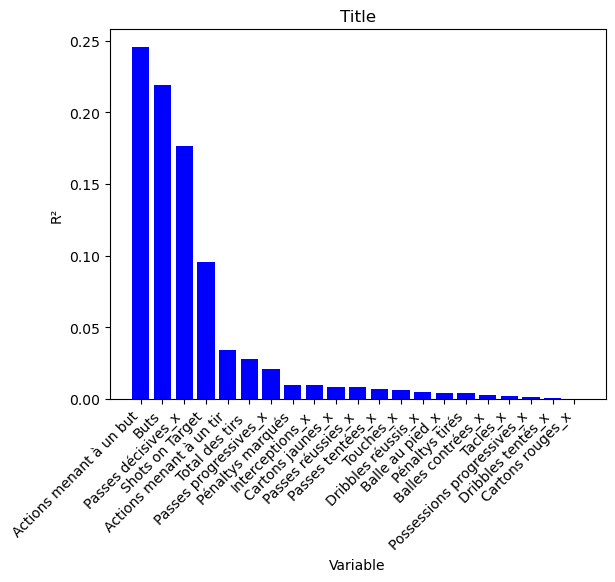

In [9]:

#print(reg_simple(x,y))

stat_forward = Var_forward
dict_forward = {}
for stat in stat_forward:
    x = data_pl_2[[stat]]
    result_reg = reg_simple(x,y)
    #print(result_reg)
    dict_forward[stat] = result_reg




import matplotlib.pyplot as plt

var = dict_forward.keys()
r2list = [ele[2] for ele in dict_forward.values()]

sorted_data = sorted(zip(var, r2list), key=lambda x: x[1], reverse=True)
var_sorted, r2list_sorted = zip(*sorted_data)

plt.bar(var_sorted, r2list_sorted, color='blue')
plt.xlabel('Variable')
plt.ylabel('R²')
plt.title('Title')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
x = data_pl_2[['Actions menant à un but','Buts','Passes décisives_x','Shots on Target',
            'Actions menant à un tir','Total des tirs','Passes progressives_x']]
y = data_pl_2['buts_equipes'].values.reshape(-1,1)
print(reg_simple(x,y))

KeyError: "['Actions mennt à un but', 'Total des tirs'] not in index"